In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing matplotlib for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Importing seaborn for making statistical graphics (built on top of matplotlib)
import seaborn as sns

# Importing scipy.stats for performing statistical tests and probability distributions
import scipy.stats as st

# Importing the warnings module to control the display of warning messages
import warnings

# Ignoring all warning messages to keep the output clean
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
# Loading the dataset from a CSV file into a pandas DataFrame for analysis
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [3]:
# Displays the first 5 rows of the DataFrame to get a quick overview of the dataset structure and contents
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory data Analysis

In [4]:
# Returns the shape of the DataFrame as (rows, columns)
df.shape

(6405008, 18)

In [5]:
# Displays the data types of each column in the DataFrame
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
# Converting the 'tpep_pickup_datetime' column from object (string) to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Converting the 'tpep_dropoff_datetime' column from object (string) to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
# Calculating trip duration by subtracting pickup time from dropoff time
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [9]:
# Displays the entire DataFrame if run in an interactive environment like Jupyter Notebook (shows a preview by default)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39


In [10]:
# Converts the 'duration' column from timedelta format to total minutes (as a float) 
# by first converting the duration to total seconds and then dividing by 60
df['duration'] = df['duration'].dt.total_seconds() / 60

In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [12]:
# Keeps only the relevant columns needed for the analysis to simplify the dataset and remove unnecessary information
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [13]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [14]:
# Checks for missing (null) values in each column and returns the count of nulls per column
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [15]:
# Calculates the percentage of missing values for each column in the DataFrame
# If the percentage is high, consider imputing the missing values; if it's low, you may drop those rows
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

passenger_count    1.021716
payment_type       1.021716
fare_amount        0.000000
trip_distance      0.000000
duration           0.000000
dtype: float64

In [16]:
# Drops all rows with missing values since they account for only about 1% of the data and won't significantly impact the analysis
df.dropna(inplace=True)

In [17]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [18]:
# Converts the 'passenger_count' column from float to integer type for consistency and accurate representation of count values
df['passenger_count'] = df['passenger_count'].astype('int64')

# Converts the 'payment_type' column from float to integer type for consistency and to prepare it for categorical mapping or analysis
df['payment_type'] = df['payment_type'].astype('int64')


In [19]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [20]:
# Checks for duplicate rows in the DataFrame and returns only the duplicated ones (excluding the first occurrence)
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [21]:
# Removes all duplicate rows from the DataFrame, keeping only the first occurrence
df.drop_duplicates(inplace=True)

In [22]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [23]:
# Calculates the relative frequency (percentage) of each unique passenger count value in the dataset
# 'normalize=True' returns the proportions instead of absolute counts
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [24]:
# Calculating the percentage (contribution) of each payment type in the dataset
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [25]:
# Removes outlier or rarely used payment types by keeping only values less than 3 
# (e.g., 1 = Credit Card, 2 = Cash), which are the most common and meaningful for analysis
df = df[df['payment_type'] < 3]

# Filters out unrealistic or extremely rare passenger counts by keeping only trips with 1 to 5 passengers
# This excludes records with 0 or 6+ passengers, which are likely errors or anomalies
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [26]:
df.shape

(2780283, 5)

In [27]:
# Replaces numeric payment type codes with readable string labels for better interpretability
# 1 becomes 'Card', and 2 becomes 'Cash'
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)

In [28]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [29]:
# Generating descriptive statistics for all numerical columns in the DataFrame
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [30]:
# Removes rows where the fare amount is zero or negative, as these indicate invalid or free trips
df = df[df['fare_amount'] > 0]

# Removes rows with zero or negative trip distance, which are likely due to data entry errors or GPS issues
df = df[df['trip_distance'] > 0]

# Removes trips with zero or negative duration, which are invalid and may result from incorrect timestamps
df = df[df['duration'] > 0]

In [31]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [32]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


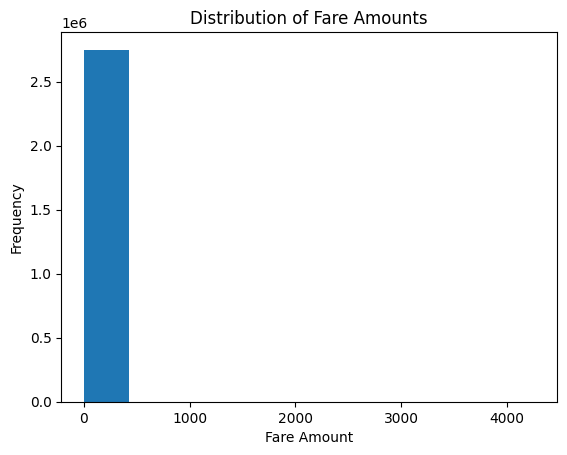

In [33]:
# Plots a histogram of the 'fare_amount' column to visualize the distribution of fare prices
# Helps identify the range, frequency, and any skewness or outliers in fare values
plt.hist(df['fare_amount'])
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Removes outliers from 'fare_amount', 'trip_distance', and 'duration' columns using the IQR (Interquartile Range) method
for col in ['fare_amount', 'trip_distance', 'duration']: 
    # Calculate the first (Q1) and third (Q3) quartiles for the column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds for acceptable values
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Keep only the rows where the column value is within the IQR bounds (i.e., non-outliers)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# At this point, the cleaned DataFrame contains 2,297,908 rows and 5 columns

In [35]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


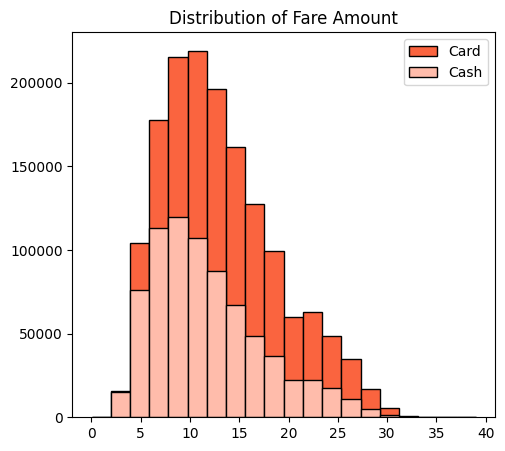

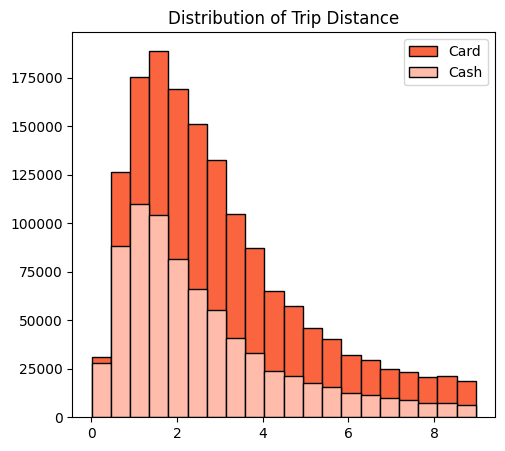

In [36]:
# Plotting side-by-side histograms to compare the distribution of fare amounts and trip distances 
# between 'Card' and 'Cash' payment types

# First figure: Distribution of fare amounts
plt.figure(figsize=(12,5))  # Set the figure size for better visibility

plt.subplot(1,2,1)  # Create the first subplot (1 row, 2 columns, position 1)
plt.title("Distribution of Fare Amount")
# Plot histogram of fare amounts for 'Card' payments
plt.hist(df[df['payment_type'] == "Card"]['fare_amount'], 
         histtype="barstacked", bins=20, edgecolor='k', color="#FA643F", label="Card")
# Plot histogram of fare amounts for 'Cash' payments
plt.hist(df[df['payment_type'] == "Cash"]['fare_amount'], 
         histtype="barstacked", bins=20, edgecolor='k', color="#FFBCAB", label="Cash")
plt.legend()  # Show legend to differentiate payment types

# Second figure: Distribution of trip distances
plt.figure(figsize=(12,5))  # Create a new figure for trip distance

plt.subplot(1,2,1)  # Create the subplot
plt.title("Distribution of Trip Distance")
# Plot histogram of trip distances for 'Card' payments
plt.hist(df[df['payment_type'] == "Card"]['trip_distance'], 
         histtype="barstacked", bins=20, edgecolor='k', color="#FA643F", label="Card")
# Plot histogram of trip distances for 'Cash' payments
plt.hist(df[df['payment_type'] == "Cash"]['trip_distance'], 
         histtype="barstacked", bins=20, edgecolor='k', color="#FFBCAB", label="Cash")
plt.legend()  # Show legend

plt.show()  # Display all plots

In [37]:
# Groups the dataset by payment type and calculates the mean and standard deviation 
# for both fare amount and trip distance within each group
df.groupby('payment_type').agg({
    'fare_amount': ['mean', 'std'],
    'trip_distance': ['mean', 'std']
})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

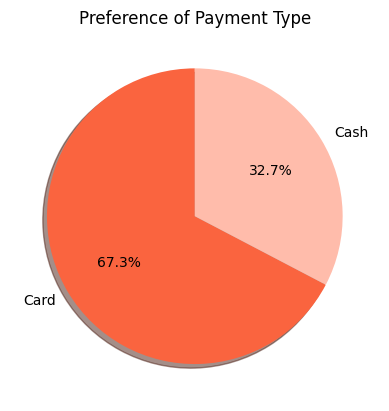

In [38]:
# Creates a pie chart to visualize the proportion of each payment type (Card vs Cash)
# Uses normalized value counts to show percentage distribution
plt.title("Preference of Payment Type")
plt.pie(
    df["payment_type"].value_counts(normalize=True),  # Proportions of each payment type
    labels=df["payment_type"].value_counts().index,   # Labels: 'Card', 'Cash'
    startangle=90,                                    # Rotates the start of the pie chart for better orientation
    shadow=True,                                      # Adds a shadow effect to the chart
    autopct="%1.1f%%",                                # Displays percentages with one decimal
    colors=["#FA643F", "#FFBCAB"]                     # Custom colors for each payment type
)
plt.show()  # Displays the pie chart

In [39]:
# Groups the data by both payment type and passenger count,
# then counts how many trips occurred for each combination
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

In [40]:
passenger_count

passenger_count
payment_type passenger_count                 
Card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
Cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

In [41]:
# Renames the column 'passenger_count' to 'count' for clarity,
# since it now represents the number of trips, not individual passenger values
passenger_count.rename(columns={"passenger_count": "count"}, inplace=True)

# Resets the index to convert the group-by index back into regular columns,
# making the DataFrame easier to use and visualize
passenger_count.reset_index(inplace=True)

In [42]:
# Calculates the percentage share of each (payment_type, passenger_count) group 
# relative to the total number of trips, and stores it in a new column 'perc'
passenger_count["perc"] = (passenger_count["count"] / passenger_count["count"].sum()) * 100

In [43]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [44]:
# Creates a new DataFrame with columns for payment_type and passenger counts from 1 to 5
df = pd.DataFrame(columns=["payment_type", 1, 2, 3, 4, 5])

# Sets the payment_type values as 'Card' and 'Cash'
df["payment_type"] = ["Card", "Cash"]

# Fills in percentage values (from 'perc' column) for 'Card' trips with passenger counts 1 to 5
df.iloc[0, 1:] = passenger_count.iloc[0:5, -1]

# Fills in percentage values (from 'perc' column) for 'Cash' trips with passenger counts 1 to 5
df.iloc[1, 1:] = passenger_count.iloc[5:, -1]

# Displays the final DataFrame
df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


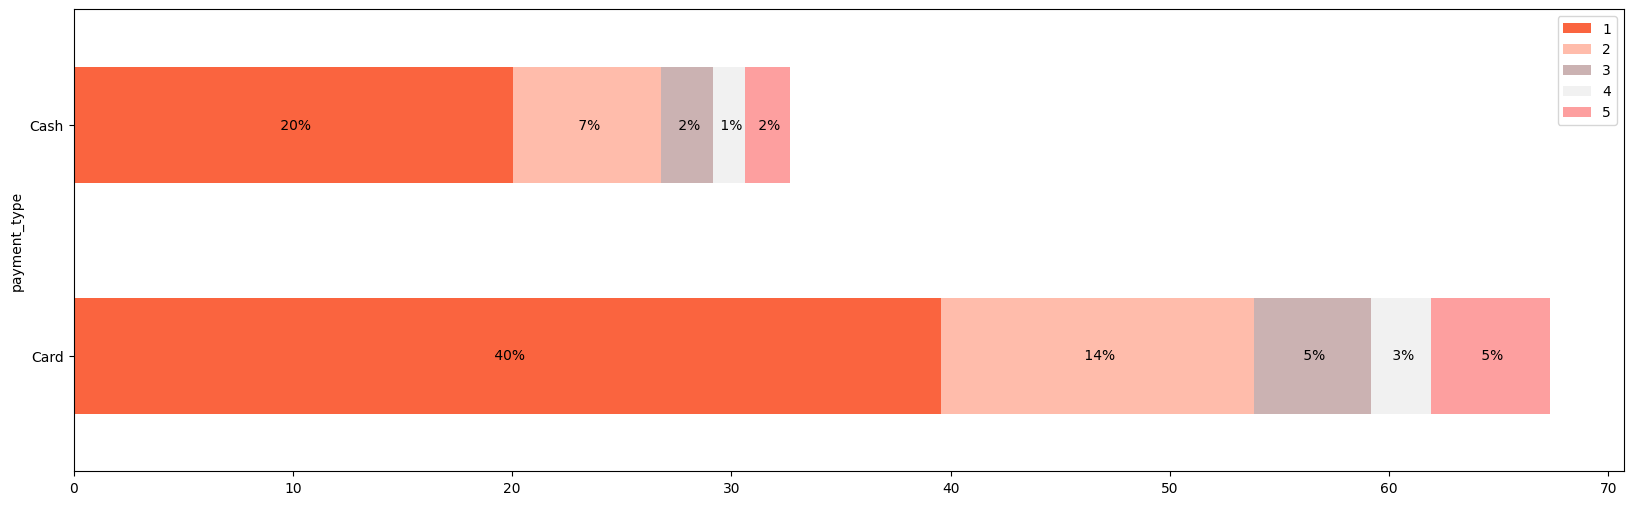

In [45]:
# Creates a horizontal stacked bar chart to show the distribution of passenger counts (1–5)
# across each payment type (Card, Cash)
fig, ax = plt.subplots(figsize=(20, 6))  # Set up the figure and axes with custom size

df.plot(
    x="payment_type",               # Set 'payment_type' as the category on the Y-axis
    kind="barh",                    # Create a horizontal bar chart
    stacked=True,                   # Stack passenger count percentages in the same bar
    ax=ax,                          # Plot on the predefined axes
    color=["#FA643F", "#FFBCAB", "#CBB2B2", "#F1F1F1", "#FD9F9F"]  # Custom colors for passenger counts 1–5
)

# Add percentage labels inside each stacked segment
for p in ax.patches:
    width = p.get_width()         # Width = value represented (percentage)
    height = p.get_height()
    x, y = p.get_xy()             # Get bottom-left coordinates of the patch
    ax.text(
        x + width / 2, 
        y + height / 2, 
        "{: .0f}%".format(width),  # Format the percentage with 0 decimal places
        horizontalalignment="center", 
        verticalalignment="center"
    )